In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)


Using TensorFlow backend.


2113536/2110848 [==============================] - 17s 8us/step


In [3]:
import numpy as np

def vectorize_sequences(inputs, dimension = 10000):
    results = np.zeros((len(inputs), dimension))
    for i,sequence in enumerate(inputs):
        results[i,sequence] = 1.
    return results

In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i,label in enumerate(labels):
        results[i, label] = 1.
        
    return results

In [6]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [7]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 构建网络

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


### 留出验证集

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 248us/step - loss: 2.5306 - acc: 0.4962 - val_loss: 1.7180 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 67us/step - loss: 1.4430 - acc: 0.6878 - val_loss: 1.3435 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 69us/step - loss: 1.0929 - acc: 0.7661 - val_loss: 1.1704 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 66us/step - loss: 0.8682 - acc: 0.8166 - val_loss: 1.0788 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 1s 67us/step - loss: 0.7020 - acc: 0.8483 - val_loss: 0.9844 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 68us/step - loss: 0.5666 - acc: 0.8796 - val_loss: 0.9401 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.4592 - acc: 0.9039 - val_loss: 0.9090 - val_acc: 0.8010
Epoch 

### 查看训练结果

In [10]:
history_dict = history.history

history_dict.keys()

dict_keys(['loss', 'val_acc', 'val_loss', 'acc'])

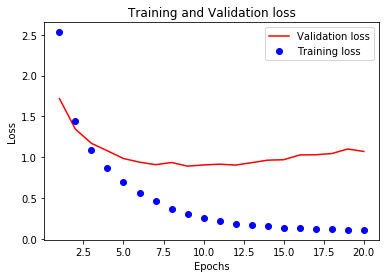

In [12]:
import matplotlib.pyplot as plt

val_loss_values = history_dict['val_loss']
loss_values = history_dict['loss']

epochs = range(1, len(loss_values) + 1)

plt.figure(1)
plt.plot(epochs, val_loss_values, 'r', label = "Validation loss")
plt.plot(epochs, loss_values, 'bo', label = "Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

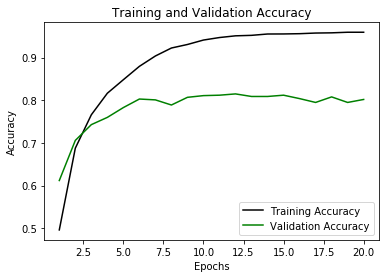

In [13]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.figure(2)
plt.plot(epochs, acc_values, 'k', label = "Training Accuracy")
plt.plot(epochs, val_acc_values, 'g', label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

毫无疑问的是 又是过拟合

### 重新训练模型

In [14]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])

model.fit(x_train, one_hot_train_labels, epochs = 9, batch_size = 512)

Epoch 1/9
8982/8982 [==============================] - 1s 68us/step - loss: 2.4429 - acc: 0.5332
Epoch 2/9
8982/8982 [==============================] - 0s 50us/step - loss: 1.3238 - acc: 0.7160
Epoch 3/9
8982/8982 [==============================] - 0s 50us/step - loss: 0.9754 - acc: 0.7866
Epoch 4/9
8982/8982 [==============================] - 0s 52us/step - loss: 0.7577 - acc: 0.8395
Epoch 5/9
8982/8982 [==============================] - 0s 52us/step - loss: 0.5967 - acc: 0.8770
Epoch 6/9
8982/8982 [==============================] - 0s 48us/step - loss: 0.4747 - acc: 0.9007
Epoch 7/9
8982/8982 [==============================] - 0s 51us/step - loss: 0.3828 - acc: 0.9178
Epoch 8/9
8982/8982 [==============================] - 0s 52us/step - loss: 0.3074 - acc: 0.9351
Epoch 9/9
8982/8982 [==============================] - 0s 49us/step - loss: 0.2588 - acc: 0.9413


In [15]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 143us/step


In [16]:
results

[0.9805544352595125, 0.7916295637218207]

### 在新数据上生成预测结果

In [17]:
predictions = model.predict(x_test)

In [18]:
predictions.shape

(2246, 46)

predictions中的每个元素都是长度为46的向量


In [19]:
np.sum(predictions[0])

1.0000001

In [20]:
np.argmax(predictions[0])

3

In [21]:
predictions[:,1].shape

(2246,)